我们来深入探讨一下马尔可夫链 (Markov Chain) 这个在数模竞赛中极其有用，且思想深刻的模型。它是一种将复杂的随机过程简化为状态和转移概率的强大工具。

一、 核心思想：无记忆的“健忘症”患者

马尔可夫链的灵魂在于马尔可夫性质 (Markov Property)，也被称为 **“无记忆性 (Memorylessness)”**。
核心思想：一个系统未来会转移到哪个状态，其概率只取决于它当前所在的状态，而与它如何到达当前状态的历史路径完全无关。
生动比喻：想象一个“健忘”的酒鬼在三个酒吧A、B、C之间闲逛。
如果他今天在酒吧A，那么他明天去酒吧B的概率是固定的（比如30%），这个概率只跟“他在A”这个当前状态有关。
他完全不记得自己昨天是在B还是C来到A的，这些历史信息对他的未来决策没有任何影响。

一个马尔可夫链模型由两个基本要素定义：
状态空间 (State Space)：系统所有可能的状态的集合。例如，{酒吧A, 酒吧B, 酒吧C}，或者 {晴天, 阴天, 雨天}。
状态转移概率矩阵 (Transition Probability Matrix) P：
这是一个方阵，P[i, j] 表示系统从状态i 转移到状态j 的概率。
这个矩阵的每一行之和必须等于1，因为从任何一个状态出发，系统必须转移到某个可能的状态之一。

二、 经典问题：市场占有率预测

这是一个在商业分析中非常经典的应用场景。
问题描述：
假设在一个稳定的市场中，有三个主要的手机品牌：A (Apple), B (Banana), C (Coconut)。市场调查公司通过大量的用户调研，得到了用户每年更换手机品牌的转移概率，如下表所示：
从 \ 至	品牌A (新)	品牌B (新)	品牌C (新)
品牌A (旧)	0.7 (忠诚)	0.2 (转向B)	0.1 (转向C)
品牌B (旧)	0.1 (转向A)	0.6 (忠诚)	0.3 (转向C)
品牌C (旧)	0.1 (转向A)	0.1 (转向B)	0.8 (忠诚)
假设在2023年初，三个品牌的市场占有率分别为：
品牌A: 40%
品牌B: 30%
品牌C: 30%
核心问题：
预测2024年和2025年，三个品牌的市场占有率分别是多少？
如果这种转移趋势长期持续下去，市场最终会达到一个稳定的状态吗？如果会，那么稳定的市场占有率分别是多少？

三、 算法实现与问题解决

马尔可夫链的数学实现非常优雅，主要依赖于矩阵乘法。

1. 建立模型
状态空间: {A, B, C}
初始状态概率分布向量 π₀:
π₀ = [0.4, 0.3, 0.3]
状态转移概率矩阵 P:
code
Code
P = [[0.7, 0.2, 0.1],
     [0.1, 0.6, 0.3],
     [0.1, 0.1, 0.8]]

2. 预测未来市场占有率
核心公式是：π_{t+1} = π_t * P
π_t 是第t年的市场占有率向量。
π_{t+1} 是第t+1年的市场占有率向量。
我们可以通过连续乘以转移矩阵 P 来预测任意 n 年后的状态：
π_n = π₀ * P^n

3. 寻找稳态分布 (Steady-State Distribution)
长期来看，如果市场占有率会达到一个稳定状态 π_s，那么它一定满足一个条件：经过一轮转移后，状态分布不再发生变化。
核心公式是：π_s = π_s * P
这是一个线性代数问题。π_s 就是转移矩阵 P 的左特征向量中，对应特征值为1的那个。同时，π_s 的所有元素之和必须为1。

--- 预测未来市场占有率 ---
2024年市场占有率 (A, B, C): ['34.00%', '29.00%', '37.00%']
2025年市场占有率 (A, B, C): ['30.40%', '27.90%', '41.70%']
10年后市场占有率 (A, B, C): ['25.09%', '25.08%', '49.83%']

--- 寻找长期稳态市场占有率 ---
长期来看，市场将稳定在 (A, B, C): ['25.00%', '25.00%', '50.00%']
100年后市场占有率 (验证): ['25.00%', '25.00%', '50.00%']


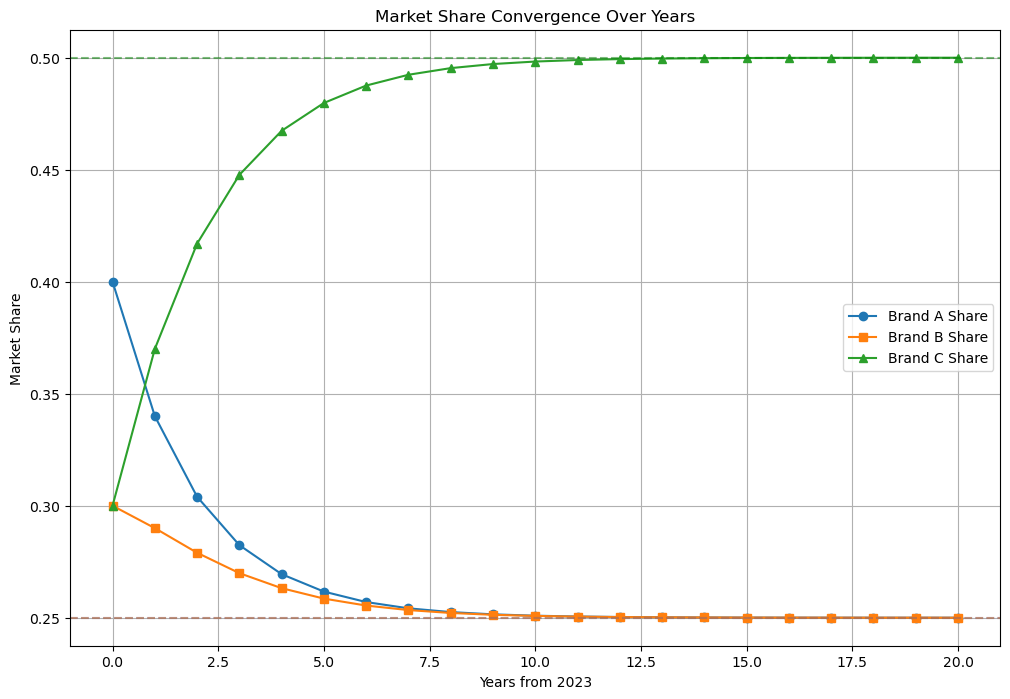

In [1]:
import numpy as np

# --- 1. 建立模型 ---
# 状态: 0:品牌A, 1:品牌B, 2:品牌C
# 初始市场占有率 (2023年)
pi_0 = np.array([0.4, 0.3, 0.3])

# 状态转移概率矩阵 P
# P[i, j] 是从状态 i 转移到状态 j 的概率
P = np.array([[0.7, 0.2, 0.1],
              [0.1, 0.6, 0.3],
              [0.1, 0.1, 0.8]])

# --- 2. 预测未来市场占有率 ---
print("--- 预测未来市场占有率 ---")

# 预测2024年 (1年后)
pi_1 = pi_0 @ P  # 使用 @ 进行矩阵乘法
print(f"2024年市场占有率 (A, B, C): {[f'{x:.2%}' for x in pi_1]}")

# 预测2025年 (2年后)
pi_2 = pi_1 @ P
# 也可以这样算: pi_2 = pi_0 @ np.linalg.matrix_power(P, 2)
print(f"2025年市场占有率 (A, B, C): {[f'{x:.2%}' for x in pi_2]}")

# 预测10年后
pi_10 = pi_0 @ np.linalg.matrix_power(P, 10)
print(f"10年后市场占有率 (A, B, C): {[f'{x:.2%}' for x in pi_10]}")


# --- 3. 寻找稳态分布 ---
print("\n--- 寻找长期稳态市场占有率 ---")
# 求解方程 pi_s * P = pi_s,  等价于 pi_s * (P - I) = 0
# 也就是求解 (P^T - I^T) * pi_s^T = 0^T
# 我们需要找到矩阵 P^T 的特征值为1对应的特征向量

# 计算 P 的转置矩阵 P.T
eigenvalues, eigenvectors = np.linalg.eig(P.T)

# 找到特征值为1 (或接近1，因为有计算误差) 的索引
steady_state_index = np.argmin(np.abs(eigenvalues - 1.0))

# 对应的特征向量就是稳态分布（未归一化）
steady_state_vector = eigenvectors[:, steady_state_index].real

# 归一化，使其和为1
steady_state_distribution = steady_state_vector / np.sum(steady_state_vector)

print(f"长期来看，市场将稳定在 (A, B, C): {[f'{x:.2%}' for x in steady_state_distribution]}")

# 我们可以通过计算 P 的一个很大的幂次来验证这个结果
pi_100 = pi_0 @ np.linalg.matrix_power(P, 100)
print(f"100年后市场占有率 (验证): {[f'{x:.2%}' for x in pi_100]}")

# --- 4. 可视化收敛过程 ---
import matplotlib.pyplot as plt

history = [pi_0]
for i in range(20):
    history.append(history[-1] @ P)

history = np.array(history)

plt.figure(figsize=(12, 8))
plt.plot(history[:, 0], 'o-', label='Brand A Share')
plt.plot(history[:, 1], 's-', label='Brand B Share')
plt.plot(history[:, 2], '^-', label='Brand C Share')

# 绘制稳态线
plt.axhline(y=steady_state_distribution[0], color='blue', linestyle='--', alpha=0.5)
plt.axhline(y=steady_state_distribution[1], color='orange', linestyle='--', alpha=0.5)
plt.axhline(y=steady_state_distribution[2], color='green', linestyle='--', alpha=0.5)

plt.title('Market Share Convergence Over Years')
plt.xlabel('Years from 2023')
plt.ylabel('Market Share')
plt.grid(True)
plt.legend()
plt.show()

结果解读与分析

短期预测：

代码会精确计算出未来几年的市场份额。你会看到，品牌A和C的份额在初期会上升，而品牌B会下降，这是因为B的客户忠诚度最低，流失严重。

长期稳态：

通过求解特征向量，我们得到了一个精确的长期稳态分布。这告诉我们，无论初始市场份额是多少，只要客户的转移行为模式不变，市场最终都会达到这个平衡点。
通过计算100次方后的结果，你会发现它和特征向量法算出的结果几乎完全一样，这验证了我们结论的正确性。
这是一个极具洞察力的结论！ 它可以告诉公司管理者，在当前的竞争格局下，他们的品牌最终会走向何方。如果对这个结果不满意，他们就必须采取措施（如提升产品、加强营销）来改变状态转移概率矩阵 P 本身。

可视化：

折线图直观地展示了市场份额的动态收敛过程。你会看到三条线经过几年的波动后，逐渐变平，最终无限趋近于我们计算出的那三条水平的虚线（稳态值）。

总结：

马尔可夫链模型通过其简洁而强大的数学框架，将一个复杂的市场动态问题，转化为了一个清晰的矩阵运算问题。它不仅能够进行短期预测，更重要的是能够揭示系统的长期均衡状态，为战略决策提供深刻的洞察。在数模竞赛中，当你遇到涉及状态转移、动态演化且具有“无记忆性”特征的问题时，马尔可夫链绝对是你的首选利器。